In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
data = pd.read_csv("real_estate_kaggle.csv")


data.head(5)

,Unnamed: 0,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,1,230.0,3,3,5,3,3790000.0,JA
1,2,85.0,2,1,2,1,1390000.0,JA
2,3,136.0,3,1,3,1,1590000.0,JA
3,4,136.0,3,1,4,1,1500000.0,JA
4,5,310.0,3,1,4,2,4150000.0,JA


# REGRESSION

In [88]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17341 entries, 0 to 17340
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17341 non-null  int64  
 1   area          17338 non-null  float64
 2   rooms         17337 non-null  object 
 3   suites        17341 non-null  object 
 4   bathrooms     17341 non-null  object 
 5   parkings      17341 non-null  object 
 6   price         17341 non-null  float64
 7   neighborhood  17341 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ MB


Unnamed: 0      0
area            3
rooms           4
suites          0
bathrooms       0
parkings        0
price           0
neighborhood    0
dtype: int64

In [89]:
data.sample(5)

,Unnamed: 0,area,rooms,suites,bathrooms,parkings,price,neighborhood
1711,1712,193.0,3,3,5,3,2050000.0,JA
14179,14180,110.0,3,1,4,2,1448000.0,JP
8179,8180,229.0,3,1,4,2,3900000.0,JA
15384,15385,176.0,3,1,3,1,1950000.0,JP
13775,13776,216.0,4,2,5,3,4798000.0,JP


In [90]:
data['rooms'].unique()

array(['3', '2', '4', '1', '5', '6', nan, '--'], dtype=object)

In [91]:
data.describe()

,Unnamed: 0,area,price
count,17341.000000,17338.000000,1.734100e+04
mean,8671.000000,193.843696,2.609121e+06
std,5006.059844,106.801935,2.295376e+06
min,1.000000,20.000000,3.200000e+04
25%,4336.000000,120.000000,1.300000e+06
50%,8671.000000,175.000000,1.950000e+06
75%,13006.000000,240.000000,3.150000e+06
max,17341.000000,1200.000000,3.900000e+07


In [92]:
data['rooms'].value_counts()


3     9473
4     3854
2     3025
1      855
5      111
6       13
--       6
Name: rooms, dtype: int64

In [93]:
nan_value = float("NaN")
data.replace(to_replace = '--', value = nan_value,inplace = True)

In [94]:
data['area'] = data['area'].fillna(data['area'].mean())
data['rooms']= data['rooms'].fillna("3")

In [95]:
data['rooms'].unique()

array(['3', '2', '4', '1', '5', '6'], dtype=object)

In [96]:
data.isnull().sum()


Unnamed: 0         0
area               0
rooms              0
suites          2104
bathrooms        136
parkings         456
price              0
neighborhood       0
dtype: int64

In [97]:
data.dropna(axis = 0, inplace = True)

In [98]:
data.rooms.value_counts()

3    8764
4    3783
2    1832
1     447
5     111
6      13
Name: rooms, dtype: int64

In [99]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [100]:
#sns.set_palette('Blues')#sns.set_style('whitegrid')


<Axes: xlabel='rooms', ylabel='count'>

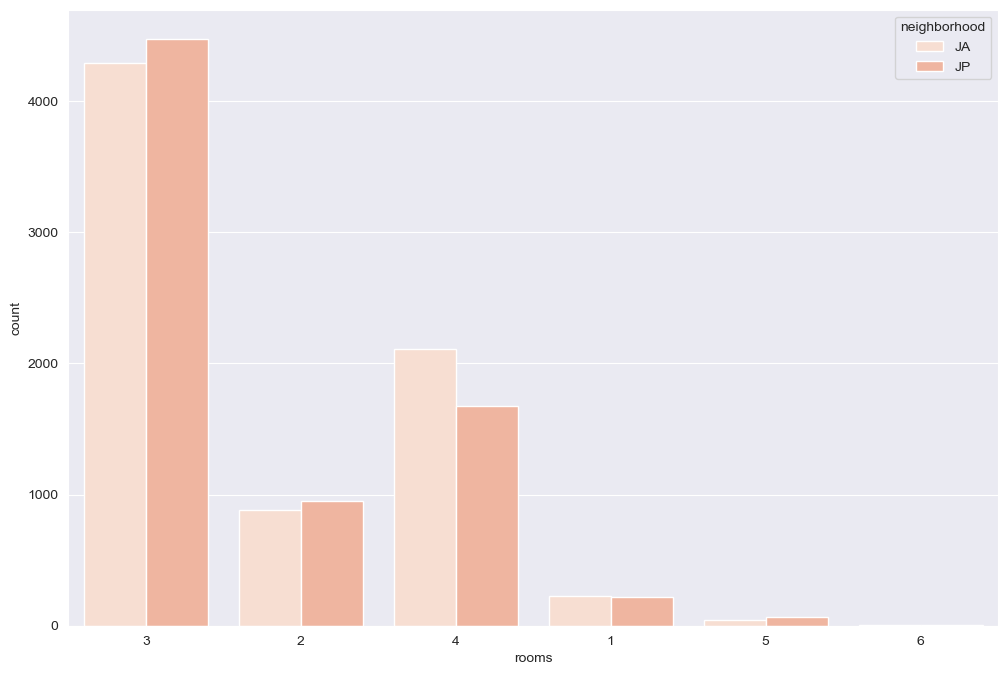

In [125]:
plt.figure(figsize=[12,8])
sns.countplot(x = data.rooms, hue =data.neighborhood, data = data)

<Axes: xlabel='bathrooms', ylabel='price'>

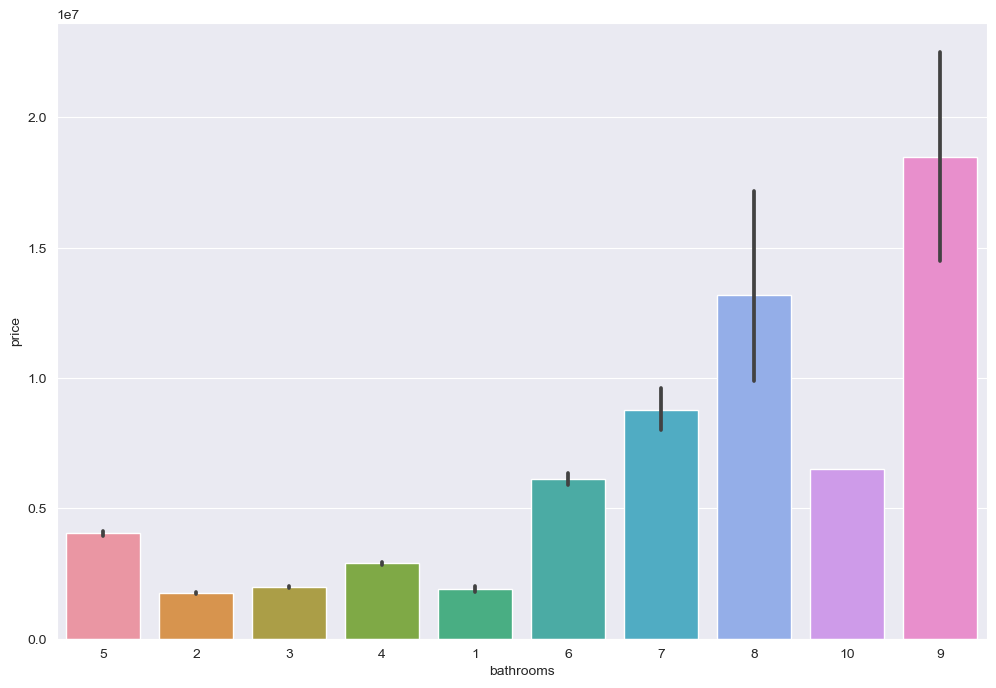

In [126]:
plt.figure(figsize=[12,8])
sns.barplot(x =data.bathrooms, y =data.price, data = data)

<Axes: xlabel='suites', ylabel='price'>

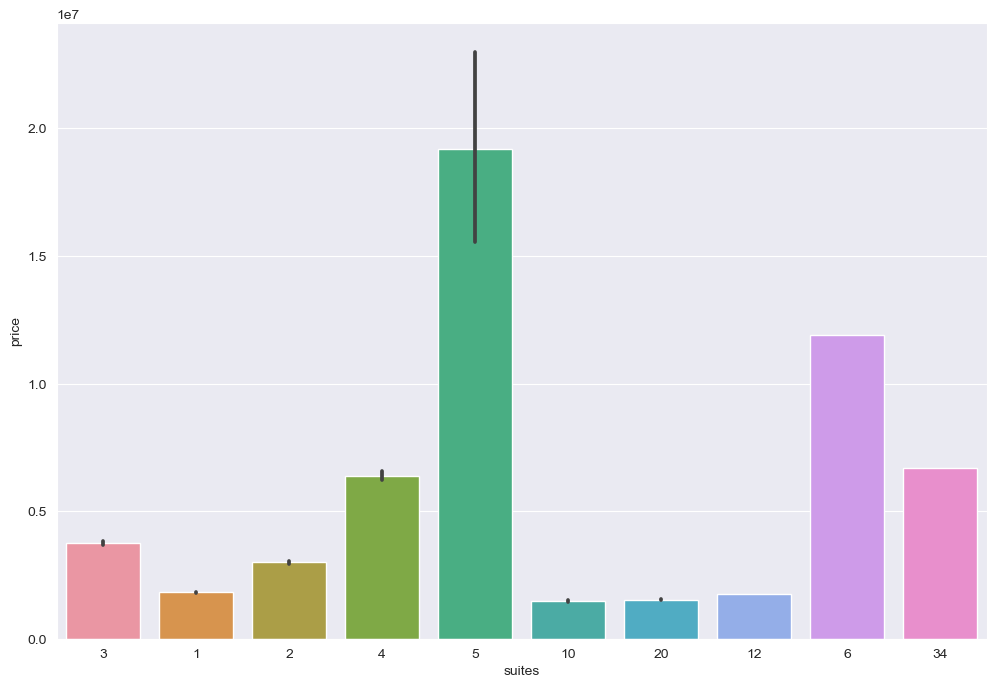

In [127]:
plt.figure(figsize=[12,8])
sns.barplot(x= data.suites, y= data.price, data = data)

<Axes: xlabel='neighborhood', ylabel='price'>

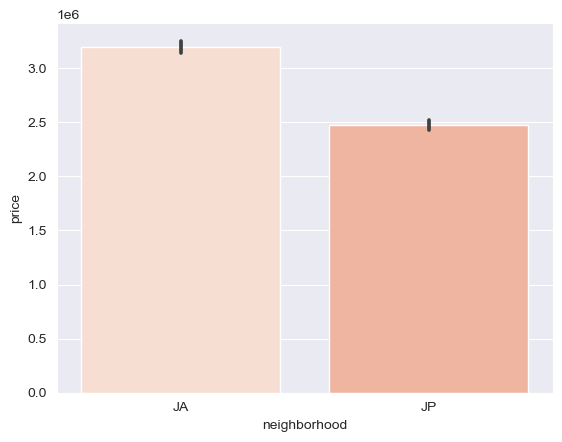

In [128]:
sns.barplot(x= data.neighborhood,y= data.price, data=data)

# There are three data types: categorical data, continoues, and discrete
# and two classes:  regression algorithms and classification algorithms

In [129]:
data.head(2)

,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,230.0,3,3,5,3,3790000.0,JA
1,85.0,2,1,2,1,1390000.0,JA


In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [131]:
y = data['price']

x = data.drop('price', axis = 1)

x.head(2)

,area,rooms,suites,bathrooms,parkings,neighborhood
0,230.0,3,3,5,3,JA
1,85.0,2,1,2,1,JA


In [132]:
le = LabelEncoder()
x['neighborhood'] =le.fit_transform(x['neighborhood'])


In [133]:
x.head(5)

,area,rooms,suites,bathrooms,parkings,neighborhood
0,230.0,3,3,5,3,0
1,85.0,2,1,2,1,0
2,136.0,3,1,3,1,0
3,136.0,3,1,4,1,0
4,310.0,3,1,4,2,0


In [134]:
#sc = MinMaxScaler()#X_sc = sc.fit_transform(X_dummy)


In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/4)


In [136]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [137]:
model = DecisionTreeRegressor(min_samples_leaf=7,min_samples_split=4)


In [138]:
model.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=4)

In [139]:
DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=4)



DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=4)

In [140]:
y_pred = model.predict(x_test)
y_pred

array([ 4399888.88888889,  2225500.        ,  2611111.11111111, ...,
        2848900.        , 11898181.81818182,  2834545.45454545])

In [141]:
y_test.tail()

15712     1490000.0
2800      2100000.0
12411     2500000.0
7587     12000000.0
6079      2700000.0
Name: price, dtype: float64

In [142]:
y_test.head(5)

188      4380000.0
3059     2700000.0
13781    2400000.0
10404    2000000.0
6765     1300000.0
Name: price, dtype: float64

In [143]:
x_test.head(2)

,area,rooms,suites,bathrooms,parkings,neighborhood
188,287.0,3,3,5,2,0
3059,212.0,3,1,4,2,0


In [144]:
from sklearn.metrics import mean_absolute_error, r2_score,max_error


In [145]:
score =r2_score(y_test, y_pred)
score

0.8937939378624761

In [146]:
mae = mean_absolute_error(y_test, y_pred)
mae


379653.61371684587

In [147]:
err = max_error(y_test, y_pred)
err

9737500.0

In [148]:
filename = 'val_model.sav'
pickle.dump(model, open(filename, 'wb'))